In [ ]:
# Import necessary libraries
import os

# Create a directory to store the datasets
os.makedirs('datasets', exist_ok=True)

# Define the URLs for the datasets
train_url = "https://www.dropbox.com/scl/fi/ghja3vpc34k78cg89uwjq/test.ft.txt?rlkey=e6rd56dtbv2ypms57m1l76brm&st=plgg4bhb&dl=0"
test_url = "https://www.dropbox.com/scl/fi/iof2u1j31x5ffoytg2du5/train.ft.txt?rlkey=4xld1u112j0gogam297xajqg2&st=yjvlyblz&dl=0"

# Use wget to download the files
!wget -O datasets/train.ft.txt {train_url}
!wget -O datasets/test.ft.txt {test_url}

# Verify the files are downloaded
!ls datasets


--2024-09-21 07:16:59--  https://www.dropbox.com/scl/fi/ghja3vpc34k78cg89uwjq/test.ft.txt?rlkey=e6rd56dtbv2ypms57m1l76brm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc878e3fd5ae959ced1afebbdd20.dl.dropboxusercontent.com/cd/0/inline/Ca9DLu8mfbTad3qfwlF0adliXlLNKVPZ1qKs-WWjLMIJdAodr8Lv_nkaGvnWijMtx1JTwY-QQSe9Q6LDQOBphti10j5S-ihZu1knXktplr4mZq3-D2hdm99KaUPa9D3nINYKPEdgzrd7TxBMfhtih7Ng/file# [following]
--2024-09-21 07:17:00--  https://uc878e3fd5ae959ced1afebbdd20.dl.dropboxusercontent.com/cd/0/inline/Ca9DLu8mfbTad3qfwlF0adliXlLNKVPZ1qKs-WWjLMIJdAodr8Lv_nkaGvnWijMtx1JTwY-QQSe9Q6LDQOBphti10j5S-ihZu1knXktplr4mZq3-D2hdm99KaUPa9D3nINYKPEdgzrd7TxBMfhtih7Ng/file
Resolving uc878e3fd5ae959ced1afebbdd20.dl.dropboxusercontent.com (uc878e3fd5ae959ced1afebbdd20.dl.dropboxusercontent.com)... 162.125.5.15, 2620:10

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [ ]:
# Reading data
with open("datasets/train.ft.txt", 'r', encoding='utf-8') as file:
    train = file.readlines()

with open("datasets/test.ft.txt", 'r', encoding='utf-8') as file:
    test = file.readlines()

# Processing training data
train_labels = []
train_reviews = []

for line in train:
    if line.startswith("__label__"):
        label = int(line.split(' ')[0].replace('__label__', '').strip())
        review = ' '.join(line.split(' ')[1:]).strip()
        train_labels.append(label)
        train_reviews.append(review)

# Convert labels to 0 and 1
train_labels = [label - 1 for label in train_labels]  # Convert 1 to 0 and 2 to 1

# Processing test data
test_labels = []
test_reviews = []

for line in test:
    if line.startswith("__label__"):
        label = int(line.split(' ')[0].replace('__label__', '').strip())
        review = ' '.join(line.split(' ')[1:]).strip()
        test_labels.append(label)
        test_reviews.append(review)

# Convert labels to 0 and 1
test_labels = [label - 1 for label in test_labels]  # Convert 1 to 0 and 2 to 1

# Creating DataFrames
train_df = pd.DataFrame({
    'review': train_reviews,
    'label': train_labels
})

test_df = pd.DataFrame({
    'review': test_reviews,
    'label': test_labels
})

# Splitting data into training and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

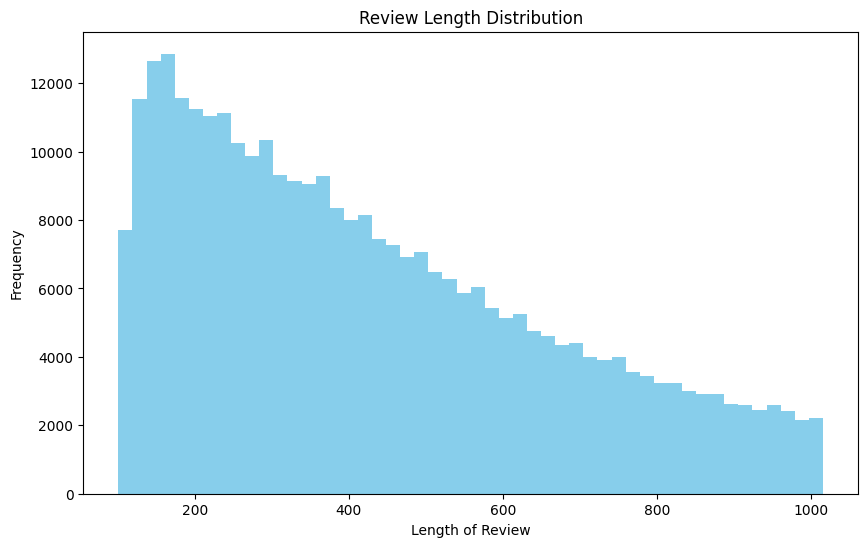

In [ ]:
# 1. Review Length Distribution
train_df['review_length'] = train_df['review'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(train_df['review_length'], bins=50, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()


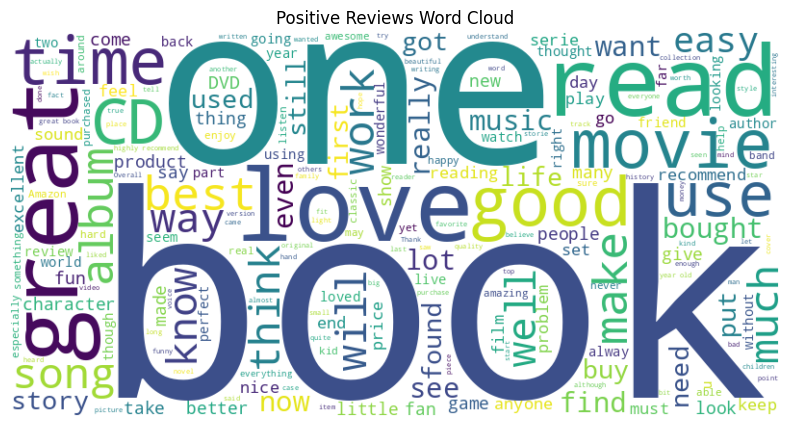

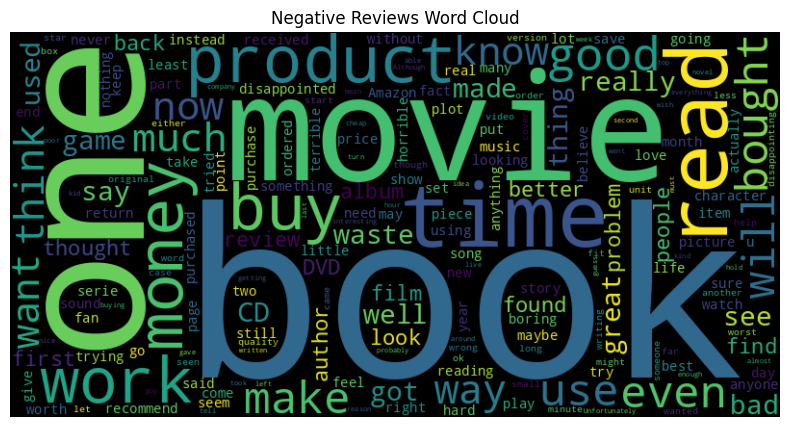

In [ ]:
# 2. Word Cloud for Positive Reviews
positive_reviews = ' '.join(train_df[train_df['label'] == 1]['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')
plt.show()

# 3. Word Cloud for Negative Reviews
negative_reviews = ' '.join(train_df[train_df['label'] == 0]['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

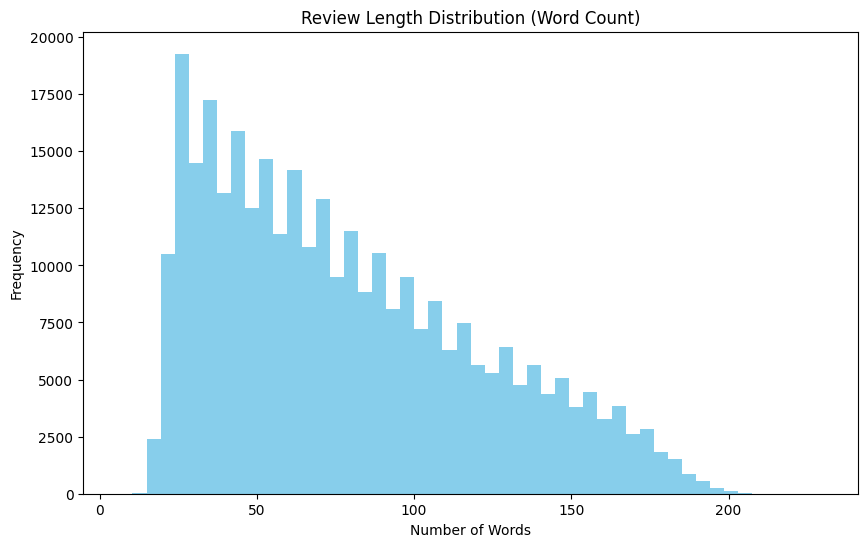

In [ ]:
# Calculate review length based on the number of words
train_df['review_length_words'] = train_df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
plt.hist(train_df['review_length_words'], bins=50, color='skyblue')
plt.title('Review Length Distribution (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


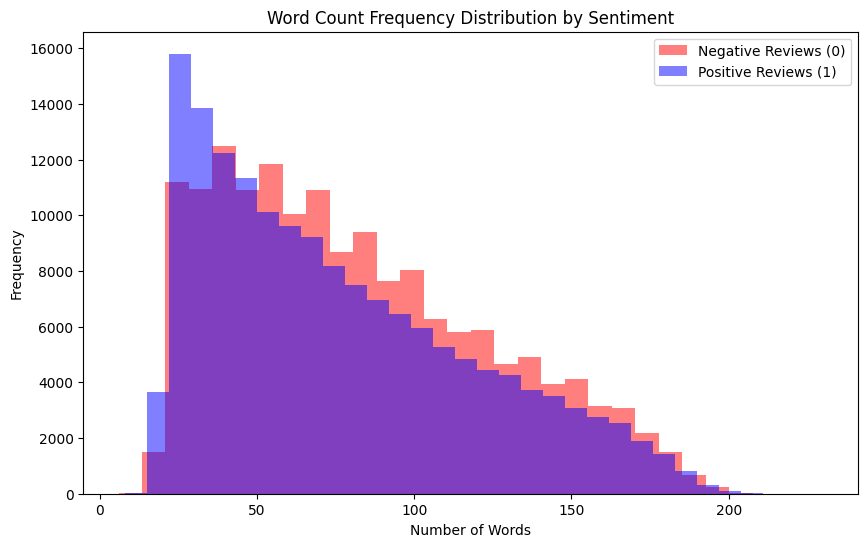

In [ ]:
# 4. Review Length Distribution by Word Count with Sentiment Distinction
train_df['review_length_words'] = train_df['review'].apply(lambda x: len(x.split()))

# Split the data by label (0 = negative, 1 = positive)
negative_reviews = train_df[train_df['label'] == 0]['review_length_words']
positive_reviews = train_df[train_df['label'] == 1]['review_length_words']

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(negative_reviews, bins=30, alpha=0.5, label='Negative Reviews (0)', color='red')
plt.hist(positive_reviews, bins=30, alpha=0.5, label='Positive Reviews (1)', color='blue')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Word Count Frequency Distribution by Sentiment')
plt.legend(loc='upper right')

# Show the plot
plt.show()